In [1]:
# Heart disease prediction

In [2]:
# import python library;
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# Data collection and processing
df = pd.read_csv('heart_disease_data.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [11]:
# splitting the features and target:
x = df.drop(columns = 'target',axis=1)
y = df['target']

In [12]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [13]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [14]:
# Splitting the data into training data and testing data;

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 4)
print(x.shape,x_train.shape,x_test.shape)

(303, 13) (181, 13) (122, 13)


In [16]:
# StandardScaler()

In [17]:
print(df.std())

age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
dtype: float64


In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(x_train)

StandardScaler()

In [20]:
scaler.fit(x_test)

StandardScaler()

In [21]:
train = scaler.transform(x_train)

In [22]:
test = scaler.transform(x_test)

In [23]:
print(test)

[[-1.18342876  0.65976823 -1.03249792 ...  1.00203012 -0.58273117
   1.06717608]
 [ 1.70636033  0.65976823  0.86170879 ... -0.58560202  2.42120697
   1.06717608]
 [-1.18342876  0.65976823 -1.03249792 ...  1.00203012 -0.58273117
  -0.54017555]
 ...
 [ 0.81719446  0.65976823  0.86170879 ... -0.58560202 -0.58273117
  -0.54017555]
 [ 0.37261152  0.65976823 -0.08539456 ...  1.00203012  0.41858154
  -0.54017555]
 [ 1.26177739  0.65976823 -1.03249792 ... -0.58560202  0.41858154
   1.06717608]]


In [24]:
print(train)

[[-0.62770009  0.65976823  0.86170879 ...  1.00203012  1.41989426
  -0.54017555]
 [-0.29426289  0.65976823  0.86170879 ... -0.58560202 -0.58273117
  -0.54017555]
 [-0.40540862 -1.51568377 -0.08539456 ...  1.00203012 -0.58273117
  -0.54017555]
 ...
 [ 1.48406886  0.65976823 -1.03249792 ... -0.58560202  1.41989426
   1.06717608]
 [ 0.70604872  0.65976823 -1.03249792 ... -0.58560202  1.41989426
   1.06717608]
 [-1.40572023 -1.51568377  0.86170879 ...  1.00203012 -0.58273117
  -0.54017555]]


In [25]:
# Model training:

In [26]:
# Logistic regresssion
log = LogisticRegression()

In [27]:
# training the lodisticregression with traing data:
log.fit(x_train,y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# training the lodisticregression with test data:
log.fit(x_test,y_test)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# accuracy on training data:
x_predict = log.predict(x_train)
train_accuracy = accuracy_score(x_predict,y_train)

In [30]:
# accuracy on testing data:
x_predict = log.predict(x_test)
test_accuracy = accuracy_score(x_predict,y_test)

In [31]:
print(train_accuracy)

0.8287292817679558


In [32]:
print(test_accuracy)

0.8278688524590164


In [33]:
# Building  a predictive system:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)
# change the input data into numpy array;
array_data = np.asarray(input_data)
# reshape the numpy array as we are predicting  for only on instance;
reshape_data = array_data.reshape(1,-1)
prediction = log.predict(reshape_data)
print(prediction)
if (prediction[0]== 0 ):
    print('The person does not have a heart disease')
else:
    print('The person has heart disease')

[1]
The person has heart disease


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [34]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [35]:
# Building  a predictive system:
input_data = (57,0,0,140,241,0,1,123,1,0.2,1,0,3)
# change the input data into numpy array;
array_data = np.asarray(input_data)
# reshape the numpy array as we are predicting  for only on instance;
reshape_data = array_data.reshape(1,-1)
prediction = log.predict(reshape_data)
print(prediction)
if (prediction[0]== 0 ):
    print('The person does not have a heart disease')
else:
    print('The person has heart disease')

[0]
The person does not have a heart disease


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
# Building  a predictive system:
input_data = (56,1,1,120,236,0,1,178,0,0.8,2,0,2)
# change the input data into numpy array;
array_data = np.asarray(input_data)
# reshape the numpy array as we are predicting  for only on instance;
reshape_data = array_data.reshape(1,-1)
prediction = log.predict(reshape_data)
print(prediction)
if (prediction[0]== 0 ):
    print('The person does not have a heart disease')
else:
    print('The person has heart disease')

[1]
The person has heart disease


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
x.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244


In [39]:
x.cov()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,82.484558,-0.416661,-0.643499,44.495902,100.585076,0.392433,-0.555013,-82.903318,0.413022,2.214583,-0.944791,2.566356,0.378139
sex,-0.416661,0.217166,-0.023736,-0.463970,-4.780309,0.007475,-0.014261,-0.469871,0.031014,0.051993,-0.008819,0.056357,0.059930
cp,-0.643499,-0.023736,1.065132,0.861714,-4.113774,0.034719,0.024108,6.991618,-0.191168,-0.178821,0.076137,-0.191080,-0.102201
trestbps,44.495902,-0.463970,0.861714,307.586453,111.967215,1.109042,-1.052324,-18.759131,0.557111,3.934486,-1.312832,1.818373,0.668022
chol,100.585076,-4.780309,-4.113774,111.967215,2686.426748,0.245427,-4.116703,-11.800494,1.631991,3.246794,-0.128964,3.737252,3.135488
fbs,0.392433,0.007475,0.034719,1.109042,0.245427,0.126877,-0.015769,-0.069897,0.004295,0.002377,-0.013147,0.050259,-0.006983
restecg,-0.555013,-0.014261,0.024108,-1.052324,-4.116703,-0.015769,0.276528,0.531462,-0.017474,-0.035883,0.030151,-0.038741,-0.003858
thalach,-82.903318,-0.469871,6.991618,-18.759131,-11.800494,-0.069897,0.531462,524.646406,-4.076290,-9.153518,5.459369,-4.993235,-1.352491
exang,0.413022,0.031014,-0.191168,0.557111,1.631991,0.004295,-0.017474,-4.076290,0.220707,0.157216,-0.074618,0.055603,0.059472
oldpeak,2.214583,0.051993,-0.178821,3.934486,3.246794,0.002377,-0.035883,-9.153518,0.157216,1.348095,-0.413219,0.264396,0.149462


<Axes: >

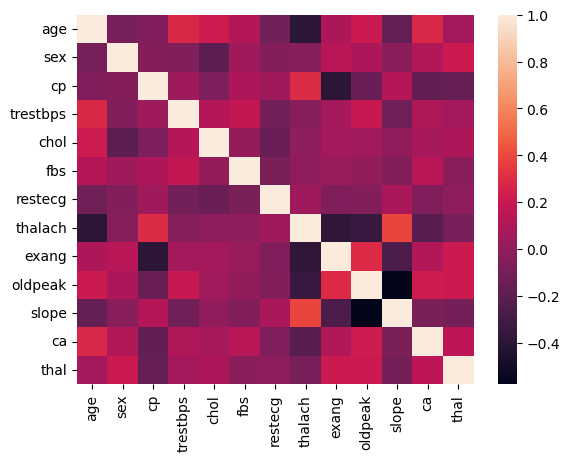

In [40]:
sns.heatmap(x.corr())

In [41]:
# drop the column traget and find the corr() and get the accuracy and drop some column and ude corr() to find the problem

In [42]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [43]:
# Splitting the features and traget;
x = df.drop(columns = ['target','exang'],axis = 1)
y = df['target']

In [44]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  oldpeak  slope  ca  \
0     63    1   3       145   233    1        0      150      2.3      0   0   
1     37    1   2       130   250    0        1      187      3.5      0   0   
2     41    0   1       130   204    0        0      172      1.4      2   0   
3     56    1   1       120   236    0        1      178      0.8      2   0   
4     57    0   0       120   354    0        1      163      0.6      2   0   
..   ...  ...  ..       ...   ...  ...      ...      ...      ...    ...  ..   
298   57    0   0       140   241    0        1      123      0.2      1   0   
299   45    1   3       110   264    0        1      132      1.2      1   0   
300   68    1   0       144   193    1        1      141      3.4      1   2   
301   57    1   0       130   131    0        1      115      1.2      1   1   
302   57    0   1       130   236    0        0      174      0.0      1   1   

     thal  
0       1  
1       2  
2  

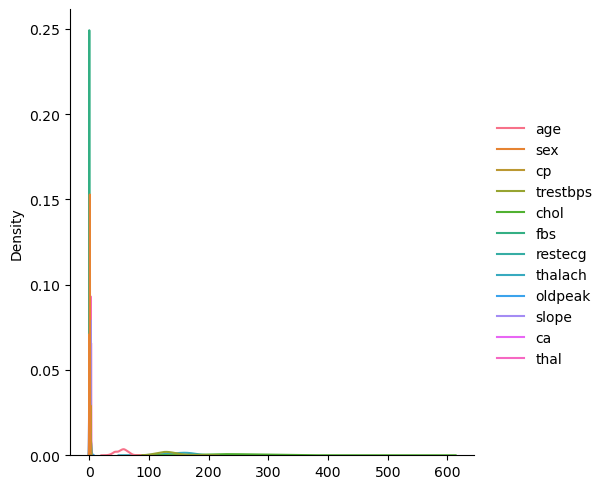

In [45]:
sns.displot(x, kind = 'kde')
plt.show()

In [46]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 4)
print(x.shape,x_train.shape,x_test.shape)

(303, 12) (181, 12) (122, 12)


In [48]:
# StandardScaler;

In [49]:
print(df.std())

age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
dtype: float64


In [50]:
scaler = StandardScaler()

In [51]:
scaler.fit(x_train)

StandardScaler()

In [52]:
scaler.fit(x_test)

StandardScaler()

In [53]:
test = scaler.transform(x_test)

In [54]:
train = scaler.transform(x_train)

In [55]:
print(test)

[[-1.18342876  0.65976823 -1.03249792 ...  1.00203012 -0.58273117
   1.06717608]
 [ 1.70636033  0.65976823  0.86170879 ... -0.58560202  2.42120697
   1.06717608]
 [-1.18342876  0.65976823 -1.03249792 ...  1.00203012 -0.58273117
  -0.54017555]
 ...
 [ 0.81719446  0.65976823  0.86170879 ... -0.58560202 -0.58273117
  -0.54017555]
 [ 0.37261152  0.65976823 -0.08539456 ...  1.00203012  0.41858154
  -0.54017555]
 [ 1.26177739  0.65976823 -1.03249792 ... -0.58560202  0.41858154
   1.06717608]]


In [56]:
print(train)

[[-0.62770009  0.65976823  0.86170879 ...  1.00203012  1.41989426
  -0.54017555]
 [-0.29426289  0.65976823  0.86170879 ... -0.58560202 -0.58273117
  -0.54017555]
 [-0.40540862 -1.51568377 -0.08539456 ...  1.00203012 -0.58273117
  -0.54017555]
 ...
 [ 1.48406886  0.65976823 -1.03249792 ... -0.58560202  1.41989426
   1.06717608]
 [ 0.70604872  0.65976823 -1.03249792 ... -0.58560202  1.41989426
   1.06717608]
 [-1.40572023 -1.51568377  0.86170879 ...  1.00203012 -0.58273117
  -0.54017555]]


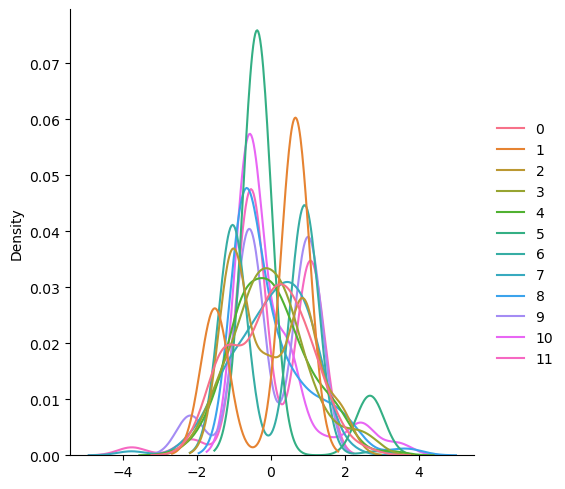

In [57]:
sns.displot(test,kind = 'kde')
plt.show()

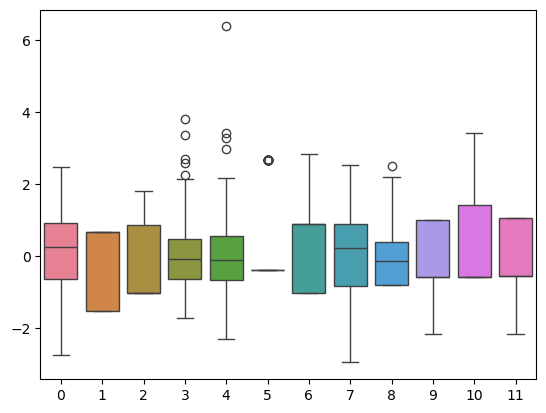

In [58]:
sns.boxplot(train)
plt.show()

In [59]:
# moden training;
# Logistic Regression
model = LogisticRegression()

In [60]:
model.fit(x_train,y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
model.fit(x_test,y_test)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
# model evaluation
# Accuracy score

In [63]:
x_predict = model.predict(x_train)
train_accuracy = accuracy_score(x_predict,y_train)

In [64]:
x_predict = model.predict(x_test)
test_accuracy = accuracy_score(x_predict,y_test)

In [65]:
print(train_accuracy)

0.8176795580110497


In [66]:
print(test_accuracy)

0.8278688524590164


In [67]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,2.3,0,0,1
1,37,1,2,130,250,0,1,187,3.5,0,0,2
2,41,0,1,130,204,0,0,172,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0.8,2,0,2
4,57,0,0,120,354,0,1,163,0.6,2,0,2


In [68]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
# Building  a predictive system:
input_data = (63,1,3,145,233,1,0,150,2.3,0,0,1)
# change the input data into numpy array;
array_data = np.asarray(input_data)
# reshape the numpy array as we are predicting  for only on instance;
reshape_data = array_data.reshape(1,-1)
prediction = model.predict(reshape_data)
print(prediction)
if (prediction[0]== 0 ):
    print('The person does not have a heart disease')
else:
    print('The person has heart disease')

[1]
The person has heart disease


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [70]:
x.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal
298,57,0,0,140,241,0,1,123,0.2,1,0,3
299,45,1,3,110,264,0,1,132,1.2,1,0,3
300,68,1,0,144,193,1,1,141,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1.2,1,1,3
302,57,0,1,130,236,0,0,174,0.0,1,1,2


In [71]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [72]:
# Building  a predictive system:
input_data = (57,0,0,140,241,0,1,123,0.2,1,0,3)
# change the input data into numpy array;
array_data = np.asarray(input_data)
# reshape the numpy array as we are predicting  for only on instance;
reshape_data = array_data.reshape(1,-1)
prediction = model.predict(reshape_data)
print(prediction)
if (prediction[0]== 0 ):
    print('The person does not have a heart disease')
else:
    print('The person has heart disease')

[0]
The person does not have a heart disease


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [73]:
x.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.210013,-0.168814,0.276326,0.068001
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.096093,-0.030711,0.118261,0.210041
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.149230,0.119717,-0.181053,-0.161736
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.058770,0.093045,-0.072042,-0.011981
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.344187,0.386784,-0.213177,-0.096439
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,1.000000,-0.577537,0.222682,0.210244
slope,-0.168814,-0.030711,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.577537,1.000000,-0.080155,-0.104764


<Axes: >

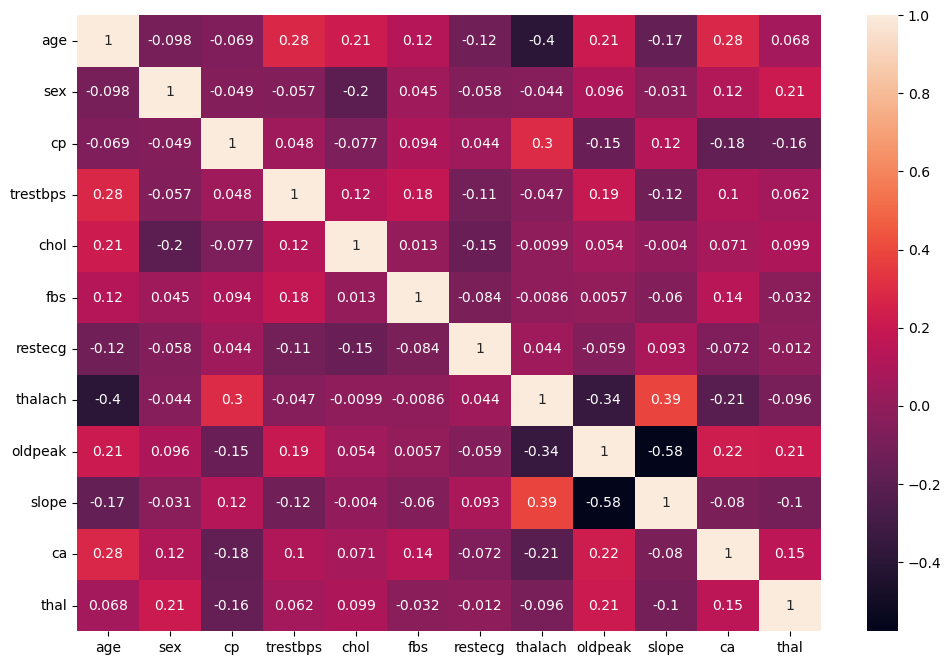

In [74]:
plt.figure(figsize=(12, 8))  
sns.heatmap(x.corr(),annot=True)

In [75]:
# Model deploy

In [76]:
import pickle

In [81]:
with open('Heart_disease','wb') as file:
    pickle.dump(model,file)

In [82]:
with open('Heart_disease','rb') as file:
    mp = pickle.load(file)

In [83]:
model.coef_

array([[-0.00983492, -1.23036713,  1.00586212, -0.01446336, -0.00683287,
         0.09427149,  0.26717325,  0.03584311, -0.30598791,  0.23692504,
        -0.49236526, -0.44886896]])

In [84]:
model.intercept_

array([-0.00832254])